# Métricas para clasificación

##### Cookbook [@data_mining_2020_1](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020_1/blob/master/README.ipynb)

## Resources

* [Choosing the Right Metric for Evaluating Machine Learning Models — Part 2](https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428)
* [Interpretability vs. Accuracy: The Friction that Defines Deep Learning](https://towardsdatascience.com/interpretability-vs-accuracy-the-friction-that-defines-deep-learning-dae16c84db5c)
* [Explainable Artificial Intelligence (XAI)](https://www.researchgate.net/publication/332209054_Explainable_Artificial_Intelligence_XAI)
* [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

## Recipe 

![imagen.png](https://miro.medium.com/max/1400/1*1WPbfzztdv50V22TpA6njw.png)
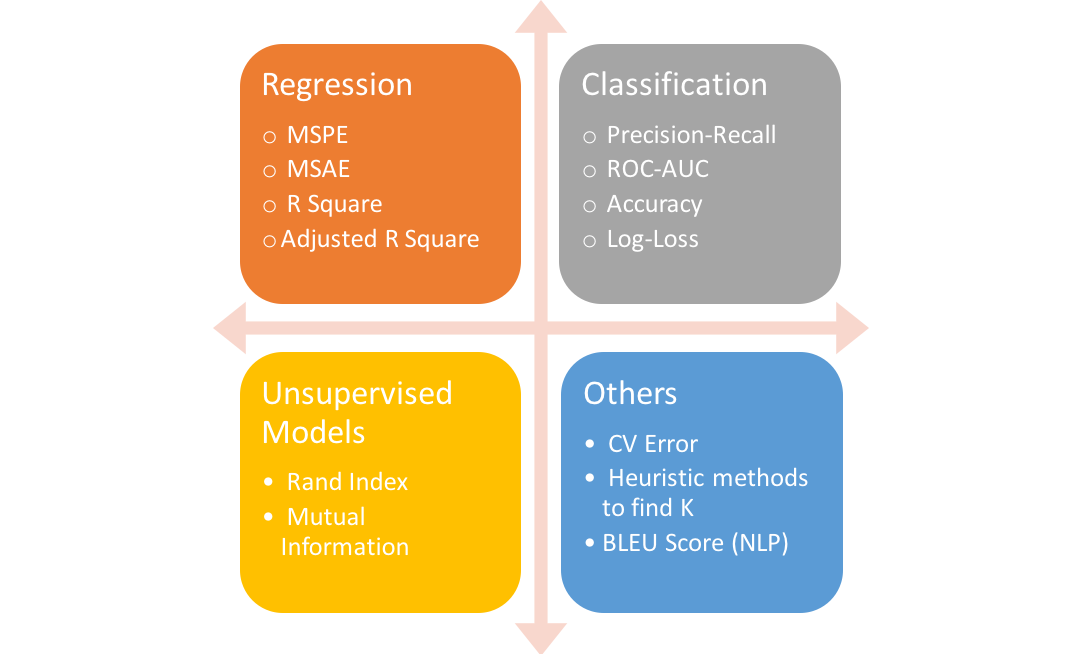

### Métricas por definición 

![imagen.png](https://miro.medium.com/max/700/1*vxxlTDnFOP5jQGud7uJrSg.png) ![imagen.png](https://miro.medium.com/max/848/1*7SgzmX05T81Ojaor9s5HWQ.png) ![imagen.png](https://miro.medium.com/max/600/0*EuzJ9ydlpbZrTK5b.)
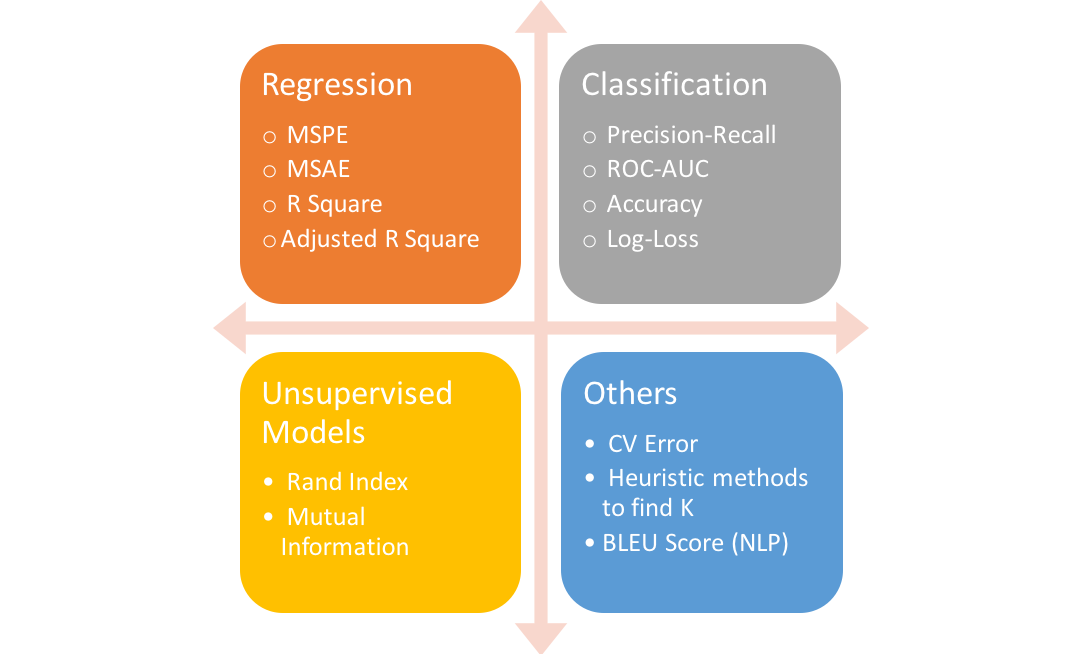

* **Sensibilidad** (*Recall* o *sensitivity*) o TPR (Tasa de Verdadero Positivo, *True Positive Rate*): Número de objetos correctamente identificados como positivos del total de verdaderos positivos: $\frac{TP}{TP+FN}$

* **Especificidad** (*Specificity*) o TNR (Tasa Negativa Verdadera, *True Negative Rate*): Número de objetos correctamente identificados como negativos del total de negativos: $\frac{TN}{TN+FP}$

* **Error de tipo I** (*Type I Error*) o FPR (Tasa de falsos positivos, *False Positive Rate*): Número de objetos erróneamente identificados como positivos del total de los verdaderos negativos: $\frac{FP}{FP+TN}$

* **Error de tipo II** (*Type I Error*) o FNR (Tasa de falsos negativos, *False Negative Rate*): Número de objetos erróneamente identificados como negativos del total de verdaderos positivos: $\frac{FN}{FN+TP}$

* **Puntaje F1** (*F1-score*): Es la media armónica de precisión y sensibilidad: $\frac{2 \times Precision \times Recall}{Precision + Recall}$

* **Precisión** (*Precision*): Número de objetos correctamente identificados como positivos del total de objetos identificados como positivos: $\frac{TP}{TP+FP}$

* **Exactitud** (*Accuracy*): :Porcentaje del total de artículos clasificados correctamente: $\frac{TP+TN}{TP+FP+FN+TN}$

### ROC-AUC

La interpretación probabilística de la puntuación ROC-AUC (Receiver Operating Characteristic)-(Area Under Curve) es que si se elige al azar un caso positivo y un caso negativo, la probabilidad de que el caso positivo supere al negativo según el clasificador viene dada por la AUC. Aquí, la clasificación se determina según el orden de los valores predichos. Matemáticamente, se calcula por el área bajo la curva mediante la razón entre la *sensibilidad* (TPR) y el *error de tipo I* FPR. Idealmente, nos gustaría tener una alta sensibilidad y una alta especificidad, pero en los escenarios del mundo real, siempre hay un equilibrio entre sensibilidad y especificidad.

![imagen.png](https://miro.medium.com/max/690/1*bGf43h_VZ7m7FQAAgtwusw.png)

Algunas características importantes de ROC-AUC son:

* El valor puede variar de 0 a 1. Sin embargo, la puntuación AUC de un clasificador aleatorio para datos balanceados es de 0.5.
* La puntuación ROC-AUC es independiente del umbral establecido para la clasificación porque sólo considera el rango de cada predicción y no su valor absoluto. No ocurre lo mismo con la puntuación F1, que necesita un valor umbral en caso de salida de probabilidades

### ¿Cuándo preferirá la F1 a la ROC-AUC?

Cuando tienes una pequeña clase positiva, entonces la puntuación de la F1 tiene más sentido. Este es el problema común en la detección de fraudes donde las etiquetas positivas son pocas. Podemos entender esta afirmación con el siguiente ejemplo.

In [1]:
from sklearn import metrics
import numpy as np

y_true = np.concatenate((np.ones(100), np.zeros(900)))

a = np.random.uniform(0.5,1, 5)
b = np.random.uniform(0,0.5, 995)
y_pred1 = np.concatenate((a,b))

print("model 1:", y_pred1.shape)

a = np.random.uniform(0.5,1, 90)
b = np.random.uniform(0,0.5, 910)
y_pred2 = np.concatenate((a,b))

print("model 2:", y_pred2.shape)

print(metrics.f1_score(y_true, y_pred1>0.5))
print(metrics.f1_score(y_true, y_pred2>0.5))

print(metrics.roc_auc_score(y_true, y_pred1))
print(metrics.roc_auc_score(y_true, y_pred2))

model 1: (1000,)
model 2: (1000,)
0.09523809523809523
0.9473684210526316
0.5734777777777778
0.9438444444444446


Podemos ver que el *modelo 1* predice 5 positivos de cada 100 positivos verdaderos en un conjunto de datos de observaciones de tamaño 1000 elementos, mientras que otro *modelo 2* predice 90 positivos de cada 100 positivos verdaderos. Claramente, el *modelo 2* está haciendo un trabajo mucho mejor que el *modelo 1* en este caso. Veamos si tanto la puntuación de la F1 como la de la ROC-AUC son capaces de capturar esa diferencia:
* Puntuación F1 para el *modelo 1* = 2*(1)*(0,1)/1,1 = 0.095
* Puntuación F1 para el *modelo 2* = 2*(1)*(0,9)/1,9 = 0.947

Sí, la diferencia en la puntuación de la F1 refleja el rendimiento del modelo.

* ROC-AUC para el modelo (1) = 0.539
* ROC-AUC para el modelo (2) = 0.946

ROC-AUC da una puntuación decente al modelo 1 también, lo cual no es un buen indicador de su rendimiento. Por lo tanto, debemos ser cuidadosos al elegir ROC-AUC para conjuntos de datos desequilibrados.

### ¿Qué métrica debería usar para la multiclasificación?

Tenemos otros tres tipos de clasificación no binaria:
* Multi-clase: tarea de clasificación con más de dos clases, de tal manera que la entrada se clasifica en **una, y sólo una de estas clases**.
    * Ejemplo: clasificar un conjunto de imágenes de frutas en cualquiera de estas categorías - manzanas, plátanos y naranjas.
* Multi-etiquetas: clasificar una muestra en un **conjunto de etiquetas de destino**. 
    * Ejemplo: etiquetar un blog en uno o más temas como tecnología, religión, política, etc. Las etiquetas están aisladas y sus relaciones no se consideran importantes.
* Jerárquicas: cada categoría puede agruparse con otras similares, creando metaclases, que a su vez pueden agruparse de nuevo hasta llegar al nivel de la raíz (conjunto que contiene todos los datos). 
    * Algunos ejemplos son la clasificación de texto y la clasificación de especies.
    
![imagen.png](https://miro.medium.com/max/2000/1*4Fng5KK0f7LCC-5mrNeV-g.png)
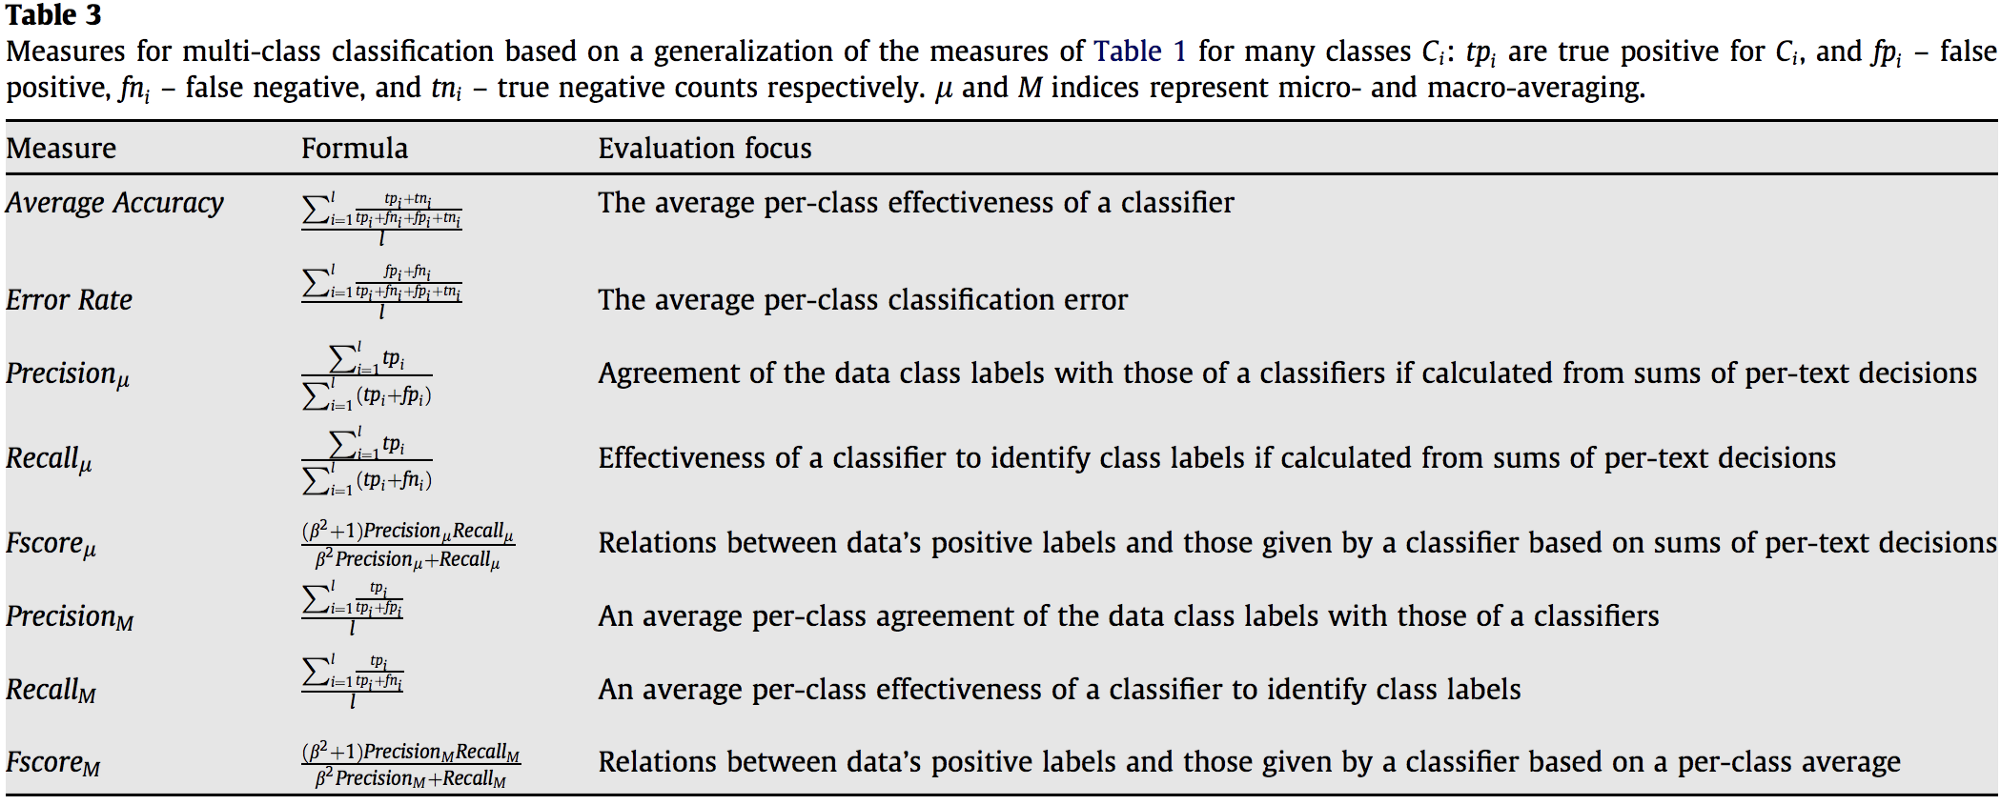

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## LOAD

In [4]:
df = pd.read_csv("../data/200418COVID19MEXICO_CLEAN_S.csv")
df.head()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,DIAS_SINTOMAS_INGRESO
0,2,9,15,1,15,15,37,2,2,1,...,2,2,2,2,2,2,2,2,1,12
1,2,12,9,1,15,9,3,1,97,2,...,2,2,2,2,1,2,2,2,2,14
2,2,9,28,2,16,28,32,1,97,2,...,2,2,2,2,2,2,2,1,1,2
3,2,12,9,2,9,9,13,1,97,2,...,2,2,2,2,2,2,2,1,3,2
4,1,3,15,2,15,15,106,1,97,2,...,2,2,2,2,1,2,2,1,3,2


In [5]:
df.shape

(48212, 26)

In [6]:
df.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'DIAS_SINTOMAS_INGRESO'],
      dtype='object')

### FEATURE SELECTION

In [7]:
df_03 = pd.read_csv("../data/df_03.csv")
important = df_03[["feature", "importance"]].sort_values(by=["importance"]).head(10)
important

,feature,importance
0,HIPERTENSION,1
1,DIAS_SINTOMAS_INGRESO,2
3,SECTOR,3
4,RESULTADO,4
2,DIABETES,5
5,OTRO_CASO,6
7,ORIGEN,7
14,OBESIDAD,8
8,NEUMONIA,9
9,INTUBADO,10


In [8]:
X = df[important.feature]

y = df.RESULTADO

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
model_01 = KNeighborsClassifier(n_neighbors=3)
model_01.fit(X_train.astype("int64").values, y_train.astype("int64"))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
y_predict = model_01.predict(X_test.astype("int64").values)

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [13]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [14]:
print("F1 score:", f1_score(y_test, y_predict, average=None).mean())
print("ROC-AUC:", multiclass_roc_auc_score(y_test.astype("int64").values, y_predict.astype("int64")))

F1 score: 0.9809588035305126
ROC-AUC: 0.9820505722281233


In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict, digits=3))

              precision    recall  f1-score   support

           1      0.985     0.953     0.969      1474
           2      0.980     0.994     0.987      5782
           3      0.995     0.979     0.987      2387

    accuracy                          0.984      9643
   macro avg      0.987     0.976     0.981      9643
weighted avg      0.984     0.984     0.984      9643



In [16]:
y_predict = model_01.predict(X_train.astype("int64").values)

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [18]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_train, y_predict, digits=3))

              precision    recall  f1-score   support

           1      0.994     0.986     0.990      5860
           2      0.993     0.998     0.995     22958
           3      0.999     0.991     0.995      9751

    accuracy                          0.995     38569
   macro avg      0.995     0.992     0.994     38569
weighted avg      0.995     0.995     0.995     38569

